In [ ]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            classification_report, confusion_matrix, ConfusionMatrixDisplay

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
df = pd.read_csv("./datasets/IMDB Dataset.csv")

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.duplicated().sum()

418

In [ ]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [ ]:
df["sentiment"].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

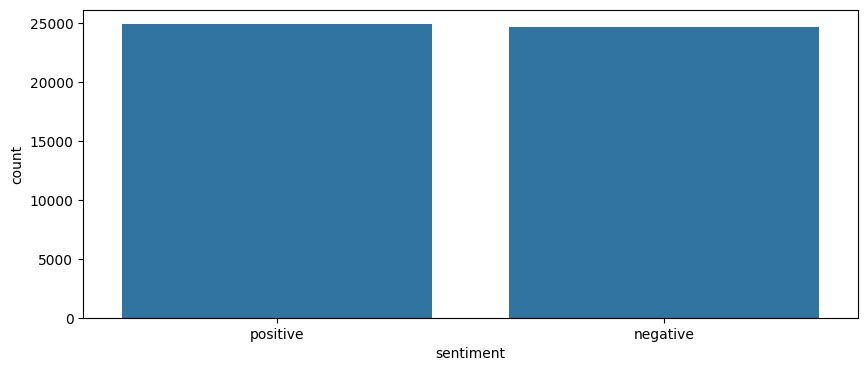

In [ ]:
plt.figure(figsize=(10, 4))

sns.countplot(data=df, x="sentiment")

plt.show()

##### Checking word counts for each instance of tweets

In [ ]:
df["word_count"] = df["review"].apply(lambda x: len(str(x).split(" ")))

df[["review", "word_count"]].head()

,review,word_count
0,One of the other reviewers has mentioned that ...,307
1,A wonderful little production. <br /><br />The...,162
2,I thought this was a wonderful way to spend ti...,166
3,Basically there's a family where a little boy ...,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",230


In [ ]:
df.sample(10)

,review,sentiment,word_count
12780,This film is about a party put together by the...,negative,201
44695,"Worst film ever, this is a statement that peop...",negative,855
21812,"I love this movie and all aspects of it, well ...",positive,96
15717,This was a movie about infidelity and revenge....,negative,161
22478,I happened across this movie while channel-sur...,negative,621
19946,Teen Deviyaan is a great film. A very breezy e...,positive,151
40468,As a young black/latina woman I am always sear...,negative,127
11711,<br /><br />This is without a doubt the funnie...,positive,52
13570,This film is absolutely horrific. One of the w...,negative,114
7250,This a wonderful sequel to the award winning L...,positive,108


In [ ]:
df.groupby("sentiment")["word_count"].mean()

sentiment
negative    229.586080
positive    233.079047
Name: word_count, dtype: float64

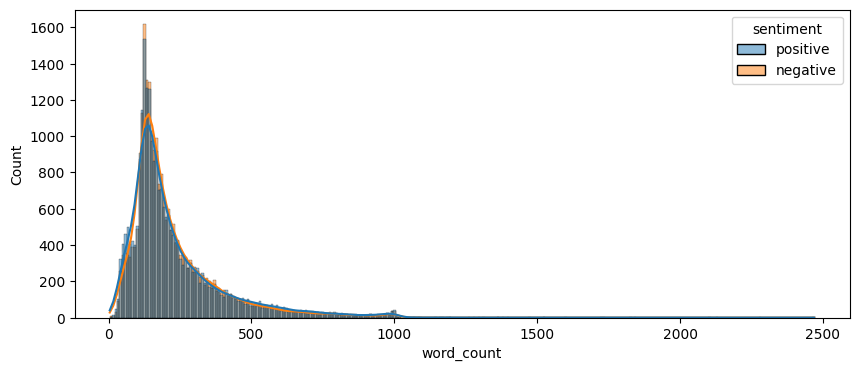

In [ ]:
plt.figure(figsize=(10, 4))

sns.histplot(data=df, x="word_count", hue="sentiment", kde=True)

plt.show()

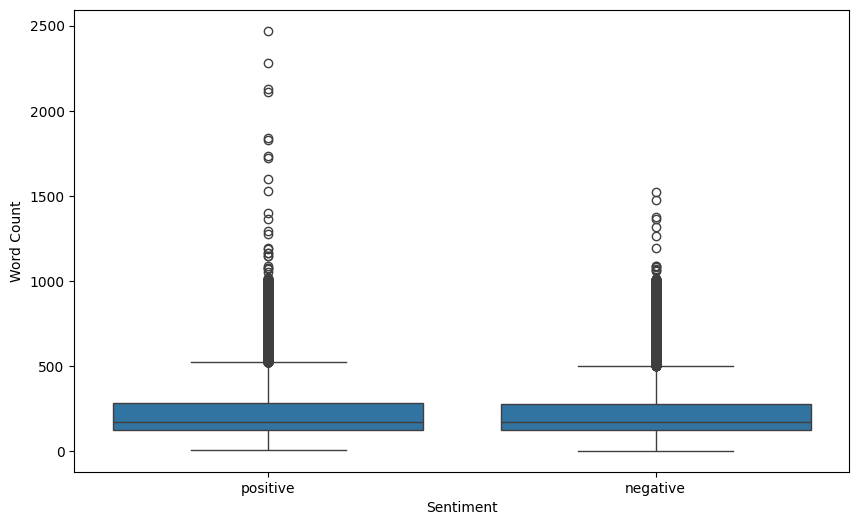

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="sentiment", y="word_count", data=df)

plt.xlabel('Sentiment')
plt.ylabel('Word Count')

plt.show()

In [ ]:
def clean_text(input_text):

    text = str(input_text).lower()

    # Replace URLs with empty string
    text = re.sub(r"http\S+", "", text)

    # Replace emails with empty string
    text = re.sub("\S*@\S*\s?", "", text)

    # Replace punctuation with empty string
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)

    # Replace newline with empty string
    text = re.sub("\n", "", text)

    # Replace digits (even within words) with empty string
    text = re.sub("\w*\d\w*", "", text)

    return text

In [ ]:
df["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
clean_text(df["review"][1])

'a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [ ]:
df["review"][10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

In [ ]:
clean_text(df["review"][10])

'phil the alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlinesbr br at first it was very odd and pretty funny but as the movie progressed i didnt find the jokes or oddness funny anymorebr br its a low budget film thats never a problem in itself there were some pretty interesting characters but eventually i just lost interestbr br i imagine this film would appeal to a stoner who is currently partakingbr br for something similar but better try brother from another planet'

In [ ]:
df["Cleaned Review"] = df["review"].apply(clean_text)

df.head(10)

,review,sentiment,word_count,Cleaned Review
0,One of the other reviewers has mentioned that ...,positive,307,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,166,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love in the time of money is a ...
5,"Probably my all-time favorite movie, a story o...",positive,119,probably my alltime favorite movie a story of ...
6,I sure would like to see a resurrection of a u...,positive,150,i sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,174,this show was an amazing fresh innovative ide...
8,Encouraged by the positive comments about this...,negative,130,encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,33,if you like original gut wrenching laughter yo...


In [ ]:
stopword = set(stopwords.words('english'))

stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopword])

    return text

In [ ]:
df['Cleaned Review'][25]

'the karen carpenter story shows a little more about singer karen carpenters complex life though it fails in giving accurate facts and detailsbr br cynthia gibb portrays karen was not a fine election she is a good actress  but plays a very naive and sort of dumb karen carpenter i think that the role needed a stronger character someone with a stronger personalitybr br louise fletcher role as agnes carpenter is terrific she does a great job as karens motherbr br it has great songs which could have been included in a soundtrack album unfortunately they werent though this movie was on the top of the ratings in usa and other several countries'

In [ ]:
remove_stopwords(df['Cleaned Review'][25])

'karen carpenter story shows little singer karen carpenters complex life though fails giving accurate facts detailsbr br cynthia gibb portrays karen fine election good actress plays naive sort dumb karen carpenter think role needed stronger character someone stronger personalitybr br louise fletcher role agnes carpenter terrific great job karens motherbr br great songs could included soundtrack album unfortunately werent though movie top ratings usa several countries'

In [ ]:
df['Cleaned Review'][100]

'this short film that inspired the soontobe full length feature  spatula madness  is a hilarious piece that contends against similar cartoons yielding multiple writers the short film stars edward the spatula who after being fired from his job joins in the fight against the evil spoons this premise allows for some funny content near the beginning but is barely present for the remainder of the feature this films  running time is absorbed by some oddball comedy and a small musical number unfortunately not much else lies below it the plot that is set up doesnt really have time to show but its surely follows it plot better than many highbudget hollywood films this film is worth watching at least a few times take it for what it is and dont expect a deep story'

In [ ]:
remove_stopwords(df['Cleaned Review'][100])

'short film inspired soontobe full length feature spatula madness hilarious piece contends similar cartoons yielding multiple writers short film stars edward spatula fired job joins fight evil spoons premise allows funny content near beginning barely present remainder feature films running time absorbed oddball comedy small musical number unfortunately much else lies plot set doesnt really time show surely follows plot better many highbudget hollywood films film worth watching least times take dont expect deep story'

In [ ]:
df["Cleaned Review"] = df["Cleaned Review"].apply(remove_stopwords)

df.sample(10)

,review,sentiment,word_count,Cleaned Review
29640,very straight - not happy with the movie.<br /...,negative,148,straight happy moviebr br main center movie st...
10245,"""Tart"" is a good illustration of old the Yogi ...",negative,420,tart good illustration old yogi berra saying d...
35209,I LOVE this movie....one of my all-time favori...,positive,100,love movieone alltime favorites first big scre...
33525,"Very touching film, a great surprise to come u...",positive,166,touching film great surprise come brazil count...
18478,The screen writers for this mini-series should...,negative,73,screen writers miniseries sentenced guillotine...
40914,"Quick and simple, I love this movie.<br /><br ...",positive,136,quick simple love moviebr br others mentioned ...
31208,"As with FOOTPRINTS (1975), I became aware of t...",positive,594,footprints became aware one purely accident me...
22562,"Watching the first few moments, you realize it...",negative,136,watching first moments realize going parody ce...
140,"Before I begin, let me get something off my ch...",negative,393,begin let get something chest im huge fan john...
18507,I would have liked to give this movie a zero b...,negative,143,would liked give movie zero wasnt option movie...


In [ ]:
positive_words = df[df['sentiment'] == "positive"]['Cleaned Review']

positive_word = ' '.join(positive_words)

wordcloud = WordCloud(width = 800,
                      height = 400,
                      background_color = "white").generate(positive_word)

wordcloud

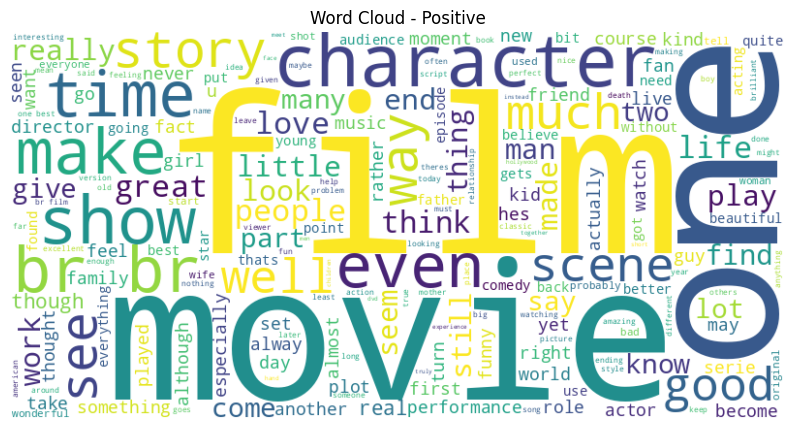

In [ ]:
plt.figure(figsize = (10, 6))

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive")

plt.show()

In [ ]:
negative_words = df[df['sentiment'] == "negative"]['Cleaned Review']

negative_word = ' '.join(negative_words)

wordcloud = WordCloud(width = 800,
                      height = 400,
                      background_color = "white").generate(negative_word)

wordcloud

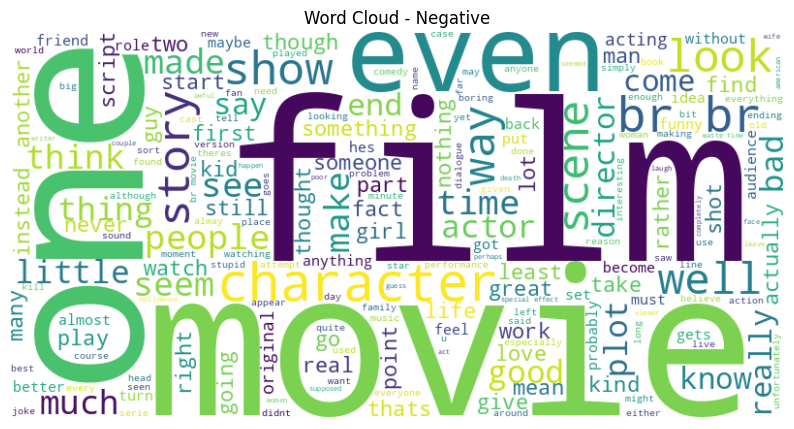

In [ ]:
plt.figure(figsize = (10, 6))

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative")

plt.show()

The vader_lexicon is a sentiment lexicon that is part of the Natural Language Toolkit (NLTK), a popular Python library for natural language processing (NLP). The vader_lexicon is not included in NLTK itself; rather, it is a lexicon used by the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool.

The vader_lexicon contains a collection of words and phrases, each associated with a sentiment score. The sentiment scores include positive, negative, and neutral values, and they indicate the degree of sentiment polarity associated with each word or phrase.

In [ ]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/loonycorn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

sia

In [ ]:
help(sia)

Help on SentimentIntensityAnalyzer in module nltk.sentiment.vader object:

class SentimentIntensityAnalyzer(builtins.object)
 |  SentimentIntensityAnalyzer(lexicon_file='sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt')
 |  
 |  Give a sentiment intensity score to sentences.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lexicon_file='sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  make_lex_dict(self)
 |      Convert lexicon file to a dictionary
 |  
 |  polarity_scores(self, text)
 |      Return a float for sentiment strength based on the input text.
 |      Positive values are positive valence, negative value are negative
 |      valence.
 |      
 |      :note: Hashtags are not taken into consideration (e.g. #BAD is neutral). If you
 |          are interested in processing the text in the hashtags too, then we recommend
 |          preprocessing your data to remove the #

##### Positive

In [ ]:
text = "Rahul is a very amazing cricketer, his shots are a sight to behold"

sia.polarity_scores(text)

{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.624}

###### Neutral

In [ ]:
text = "The movie was an average one, I would not see it more than once"

sia.polarity_scores(text)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

###### Negative

In [ ]:
text = "The food delivered was really very bad, definitely would not recommend"

sia.polarity_scores(text)

{'neg': 0.355, 'neu': 0.459, 'pos': 0.186, 'compound': -0.4477}

##### Function to calculate polarity scores is defined

In [ ]:
pol_scorer = lambda x: sia.polarity_scores(x)

pol_scorer

<function __main__.<lambda>(x)>

In [ ]:
df["polarity_score"] = df["Cleaned Review"].apply(pol_scorer)

df[['Cleaned Review', 'sentiment', 'polarity_score']].sample(10)

,Cleaned Review,sentiment,polarity_score
1682,retrospect golden era american cinema demonstr...,positive,"{'neg': 0.045, 'neu': 0.762, 'pos': 0.192, 'co..."
14594,luis bunuel always filmmaker whose work obscur...,positive,"{'neg': 0.169, 'neu': 0.599, 'pos': 0.232, 'co..."
33720,disappointing comedydrama sentimental coating ...,negative,"{'neg': 0.045, 'neu': 0.796, 'pos': 0.16, 'com..."
27434,figure alternate reality teen flickmore precis...,negative,"{'neg': 0.095, 'neu': 0.67, 'pos': 0.234, 'com..."
14125,wow watched one night mccools yesterday say wo...,negative,"{'neg': 0.22, 'neu': 0.586, 'pos': 0.194, 'com..."
18903,dont review james bond movies evaluate rate ac...,positive,"{'neg': 0.142, 'neu': 0.656, 'pos': 0.202, 'co..."
16676,main castbr br vlastimil brodský frantisek hán...,positive,"{'neg': 0.103, 'neu': 0.669, 'pos': 0.227, 'co..."
38633,cut film film students making film much scream...,negative,"{'neg': 0.364, 'neu': 0.451, 'pos': 0.184, 'co..."
39170,entertaining youll laugh lot cringe probably s...,negative,"{'neg': 0.271, 'neu': 0.488, 'pos': 0.241, 'co..."
24554,cartoon writers unrelenting corny fun puns fir...,positive,"{'neg': 0.126, 'neu': 0.669, 'pos': 0.205, 'co..."


In [ ]:
df["negative"] = df["polarity_score"].apply(lambda txt: txt["neg"])

df['positive'] = df["polarity_score"].apply(lambda txt: txt['pos'])

df['compound'] = df["polarity_score"].apply(lambda txt: txt['compound'])

df

,review,sentiment,word_count,Cleaned Review,polarity_score,negative,positive,compound
0,One of the other reviewers has mentioned that ...,positive,307,one reviewers mentioned watching oz episode yo...,"{'neg': 0.295, 'neu': 0.605, 'pos': 0.1, 'comp...",0.295,0.100,-0.9934
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production br br filming tech...,"{'neg': 0.075, 'neu': 0.657, 'pos': 0.268, 'co...",0.075,0.268,0.9582
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,"{'neg': 0.148, 'neu': 0.549, 'pos': 0.302, 'co...",0.148,0.302,0.9520
3,Basically there's a family where a little boy ...,negative,138,basically theres family little boy jake thinks...,"{'neg': 0.213, 'neu': 0.658, 'pos': 0.129, 'co...",0.213,0.129,-0.8858
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love time money visually stunni...,"{'neg': 0.03, 'neu': 0.722, 'pos': 0.249, 'com...",0.030,0.249,0.9871
...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,thought movie right good job wasnt creative or...,"{'neg': 0.08, 'neu': 0.616, 'pos': 0.304, 'com...",0.080,0.304,0.9762
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,bad plot bad dialogue bad acting idiotic direc...,"{'neg': 0.343, 'neu': 0.459, 'pos': 0.198, 'co...",0.343,0.198,-0.9320
49997,I am a Catholic taught in parochial elementary...,negative,230,catholic taught parochial elementary schools n...,"{'neg': 0.236, 'neu': 0.587, 'pos': 0.177, 'co...",0.236,0.177,-0.9074
49998,I'm going to have to disagree with the previou...,negative,212,im going disagree previous comment side maltin...,"{'neg': 0.152, 'neu': 0.712, 'pos': 0.135, 'co...",0.152,0.135,-0.5267


In [ ]:
def polarity_score(compound):
    if compound >= 0.05:
        return "positive"
    elif compound < 0.05:
        return "negative"

In [ ]:
df['predicted_sentiment'] = df['compound'].apply(lambda val: polarity_score(val))

df.sample(10)

,review,sentiment,word_count,Cleaned Review,polarity_score,negative,positive,compound,predicted_sentiment
18155,This was one of those wonderful rare moments i...,positive,148,one wonderful rare moments tv wished id captur...,"{'neg': 0.067, 'neu': 0.585, 'pos': 0.348, 'co...",0.067,0.348,0.9717,positive
16907,There have been some harsh criticisms of Coman...,positive,301,harsh criticisms comanche moon imdb think thre...,"{'neg': 0.191, 'neu': 0.538, 'pos': 0.271, 'co...",0.191,0.271,0.9632,positive
37088,"I never saw the other two ""Ninja"" movies and f...",negative,149,never saw two ninja movies know known reason w...,"{'neg': 0.289, 'neu': 0.594, 'pos': 0.116, 'co...",0.289,0.116,-0.9549,negative
353,This film held my interest enough to watch it ...,positive,680,film held interest enough watch several times ...,"{'neg': 0.243, 'neu': 0.604, 'pos': 0.153, 'co...",0.243,0.153,-0.9942,negative
32903,"The auteur of ""Prince"" manages to take an exce...",negative,88,auteur prince manages take excellent cast dece...,"{'neg': 0.282, 'neu': 0.429, 'pos': 0.289, 'co...",0.282,0.289,0.1280,positive
25956,"In the spirit of the Great Space Coaster, but ...",positive,178,spirit great space coaster years earlierbr br ...,"{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'comp...",0.000,0.121,0.8957,positive
18432,This takes place on Fire Island back in the 19...,negative,304,takes place fire island back couple peter crai...,"{'neg': 0.22, 'neu': 0.566, 'pos': 0.214, 'com...",0.220,0.214,-0.1068,negative
33382,"Lucille Ball's version of ""Mame"" in my opinion...",negative,127,lucille balls version mame opinion one worst p...,"{'neg': 0.247, 'neu': 0.565, 'pos': 0.188, 'co...",0.247,0.188,-0.7477,negative
19793,This is such a great film! Never mind the low ...,positive,242,great film never mind low rating really idea c...,"{'neg': 0.077, 'neu': 0.506, 'pos': 0.418, 'co...",0.077,0.418,0.9956,positive
18124,"As I was reading through the comments, I was s...",positive,173,reading comments surprised come across one sai...,"{'neg': 0.11, 'neu': 0.557, 'pos': 0.333, 'com...",0.110,0.333,0.9719,positive


In [ ]:
df['predicted_sentiment'].value_counts()

predicted_sentiment
positive    33771
negative    15811
Name: count, dtype: int64

In [ ]:
accuracy = accuracy_score(df["sentiment"], df["predicted_sentiment"])

f1 = f1_score(df["sentiment"], df["predicted_sentiment"], average = None)

precision = precision_score(df["sentiment"], df["predicted_sentiment"], average = None)

recall = recall_score(df["sentiment"], df["predicted_sentiment"], average = None)

In [ ]:
class_names = ["negative", "positive"]

print(f"Accuracy: {accuracy:.2f}")

for class_label, prec, rec, f1 in zip(class_names, precision, recall, f1):
    print(f"Class {class_label}:")
    print(f"   Precision: {prec:.2f}")
    print(f"   Recall: {rec:.2f}")
    print(f"   F1 score: {f1:.2f}")

Accuracy: 0.68
Class negative:
   Precision: 0.78
   Recall: 0.50
   F1 score: 0.61
Class positive:
   Precision: 0.63
   Recall: 0.86
   F1 score: 0.73


In [ ]:
report = classification_report(df["sentiment"], df["predicted_sentiment"])

print(report)

              precision    recall  f1-score   support

    negative       0.78      0.50      0.61     24698
    positive       0.63      0.86      0.73     24884

    accuracy                           0.68     49582
   macro avg       0.70      0.68      0.67     49582
weighted avg       0.70      0.68      0.67     49582



In [ ]:
pd.crosstab(df["sentiment"], df["predicted_sentiment"])

predicted_sentiment,negative,positive
sentiment,,
negative,12280,12418
positive,3531,21353


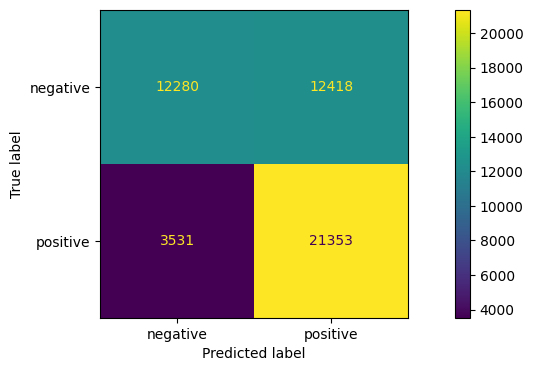

In [ ]:
cm = confusion_matrix(df["sentiment"], df["predicted_sentiment"])
cmp = ConfusionMatrixDisplay(cm, display_labels=["negative", "positive"])

fig, ax = plt.subplots(figsize=(12, 4))

cmp.plot(ax=ax)

In [ ]:
df = df.drop(columns = ['negative', 'positive', 'compound',
                        'polarity_score', 'predicted_sentiment'])

df

,review,sentiment,word_count,Cleaned Review
0,One of the other reviewers has mentioned that ...,positive,307,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,138,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love time money visually stunni...
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,230,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,212,im going disagree previous comment side maltin...


In [ ]:
df.to_csv('./datasets/movie_review_polarity.csv', index=False)